In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #Another library for visualization
np.set_printoptions(suppress=True)
sns.set_style("ticks") #to see seaborn inline in notebook
%matplotlib inline #to see matplotlib inline in notebook
plt.style.use("seaborn-poster")  # make bigger plots

UsageError: unrecognized arguments: #to see matplotlib inline in notebook


In [2]:
df=pd.read_csv("housing_prices.csv")
df.head(10)

,AREA,FLOOR,ROOM,CODE,PRICE
0,1000,7,2,B,5618
1,1030,7,1,A,5201
2,1060,1,1,A,4779
3,1090,6,1,A,5425
4,1120,0,2,B,5657
5,1150,1,1,B,4945
6,1180,6,2,B,6475
7,1210,0,1,A,5352
8,1240,0,2,B,6290
9,1270,7,1,A,6147


In [3]:
x=df.iloc[:,:-2].values # Code and target(price)
y=df.iloc[:,-1].values

In [4]:
x

array([[1000,    7,    2],
       [1030,    7,    1],
       [1060,    1,    1],
       [1090,    6,    1],
       [1120,    0,    2],
       [1150,    1,    1],
       [1180,    6,    2],
       [1210,    0,    1],
       [1240,    0,    2],
       [1270,    7,    1],
       [1300,   10,    2],
       [1330,    3,    2],
       [1360,    3,    3],
       [1390,    8,    3],
       [1420,    3,    2],
       [1450,    7,    2],
       [1480,    8,    3],
       [1510,    7,    2],
       [1540,    6,    3],
       [1570,    8,    3],
       [1600,    6,    2],
       [1630,    4,    3],
       [1660,    1,    3],
       [1690,    3,    3],
       [1720,    3,    3],
       [1750,    0,    2],
       [1780,    4,    2],
       [1810,    1,    3],
       [1840,    6,    2],
       [1870,    6,    3],
       [1900,    8,    2],
       [1930,    8,    2],
       [1960,    0,    2],
       [1990,    8,    2],
       [2020,    0,    4],
       [2050,   10,    3],
       [2080,    9,    5],
 

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train of x: ",x_train.shape) # x is always 2d so that (40,1)
print("Train of y:",y_train.shape) # y is always 1d so that (40,)
print("Test of x:",x_test.shape)
print('Test of y:',y_test.shape)

Train of x:  (40, 3)
Train of y: (40,)
Test of x: (10, 3)
Test of y: (10,)


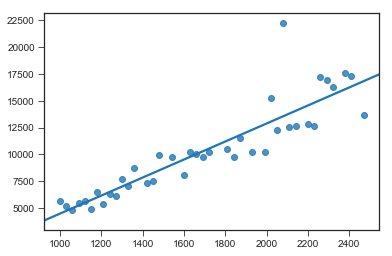

In [6]:
sns.regplot(x_train[:,0],y_train,order=1,ci=0)

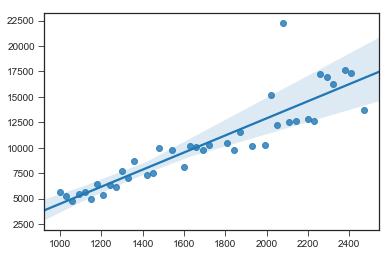

In [7]:
sns.regplot(x_train[:,0],y_train,order=1,ci=100) # ci = 100 use to get shade around the regression line

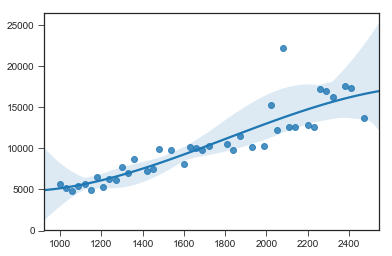

In [8]:
sns.regplot(x_train[:,0],y_train,order=3,ci=100) # order increases, no. changes in the curve increases

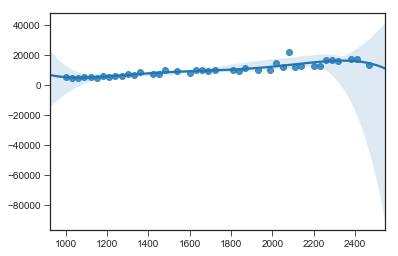

In [9]:
sns.regplot(x_train[:,0],y_train,order=5,ci=100)

In [70]:
x_train_fea_1 = x_train[:,0:1] ** 3

In [71]:
print(x_train_fea_1[:10])

[[ 2515456000]
 [ 1404928000]
 [ 9393931000]
 [ 1906624000]
 [ 1295029000]
 [ 1643032000]
 [11089567000]
 [13481272000]
 [13997521000]
 [ 3048625000]]


In [72]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train_fea_1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
x_test_fea_1 = x_test[:,0:1] ** 3

In [75]:
x_test_fea_1

array([[ 2685619000],
       [10218313000],
       [ 6859000000],
       [12977875000],
       [ 3442951000],
       [14526784000],
       [ 5639752000],
       [ 5359375000],
       [ 7529536000],
       [ 3869893000]], dtype=int64)

In [76]:
reg.predict(x_test_fea_1)

array([ 7485.68871869, 14154.2592618 , 11180.31451947, 16597.25427328,
        8156.1423262 , 17968.47802555, 10100.93424761,  9852.72108467,
       11773.9290507 ,  8534.10708155])

In [77]:
reg.score(x_train_fea_1,y_train)

0.7758363139494961

In [78]:
reg.score(x_test_fea_1,y_test)

0.6168166788240111

In [79]:
x_train_fea_2 = x_train[:,1:2] ** 3
x_test_fea_2 = x_test[:,1:2] ** 3

In [80]:
reg2=LinearRegression()
reg2.fit(x_train_fea_2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
print(reg2.score(x_train_fea_2,y_train))
print(reg2.score(x_test_fea_2,y_test))

0.08691221932592419
-0.1667983499417891


In [85]:
x_train_fea_3 = x_train[:,2:3] ** 3
x_test_fea_3 = x_test[:,2:3] ** 3
reg3=LinearRegression()
reg3.fit(x_train_fea_3,y_train)
print(reg3.score(x_train_fea_3,y_train))
print(reg3.score(x_test_fea_3,y_test))

0.866802503202835
0.7390141485278222


In [52]:
# Column 1 has larger score when cubing the entire column
# Column 2 has no effect on the target even in Linear,Square,Cube
# Column 3 has larger score when cubing the entire column

In [53]:
x_train_poly = x_train[:,[0,2]] ** 3
x_test_poly = x_test[:,[0,2]] ** 3

In [54]:
reg_poly = LinearRegression()
reg_poly.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
reg_poly.score(x_train_poly,y_train)

0.9825360935836045

In [56]:
reg_poly.score(x_test_poly,y_test)

0.96320580965077

In [ ]:
reg_poly.